In [1]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print(xgb.__version__)
print ("All imports succesful")

3.1.0
All imports succesful


In [ ]:
# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15,
                  noise=10, random_state=42)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost regressor
xgb_regressor = xgb.XGBRegressor(
                  max_depth=6,
                  learning_rate=0.1,
                  n_estimators=100,
                  objective='reg:squarederror',
                  subsample=0.8,
                  colsample_bytree=0.8,
                  gamma=0,
                  reg_alpha=0,
                  reg_lambda=1,
                  random_state=42
)

# Train the model
xgb_regressor.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
)
print("model training with xgboost successful")

model training with xgb successful


In [4]:
# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate performance
print("XGBoost Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

XGBoost Regression Results:
RMSE: 94.3686
R² Score: 0.8257


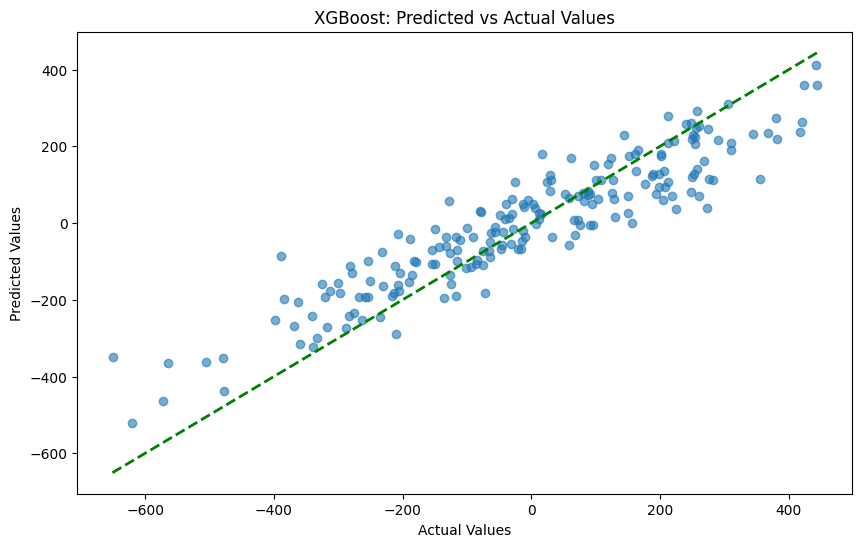

In [5]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], 
        [y_test.min(), y_test.max()], 'g--'
        , lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Predicted vs Actual Values')
plt.show()

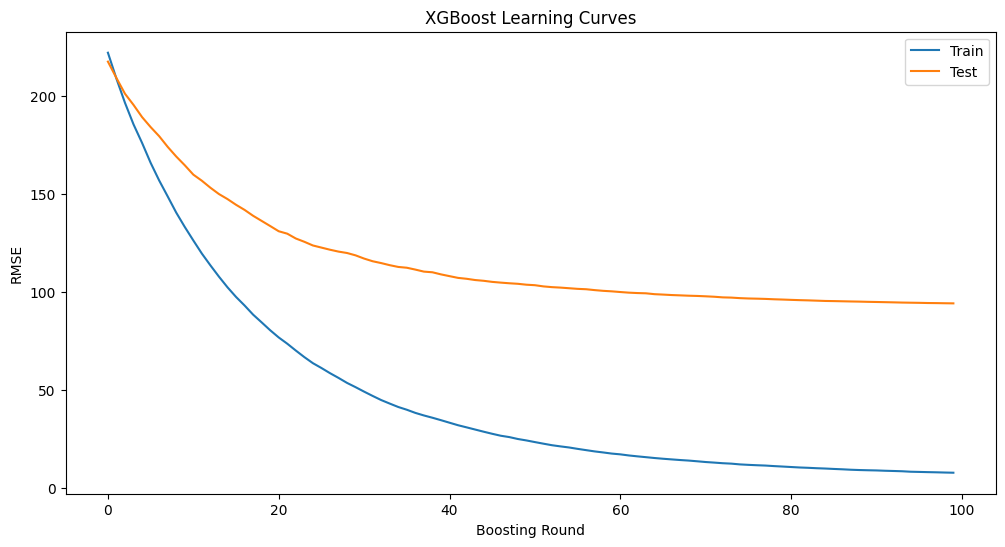

In [6]:
# Retrieve evaluation results
results = xgb_regressor.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot learning curves
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
ax.set_ylabel('RMSE')
ax.set_xlabel('Boosting Round')
ax.set_title('XGBoost Learning Curves')
plt.show()

<Figure size 1000x800 with 0 Axes>

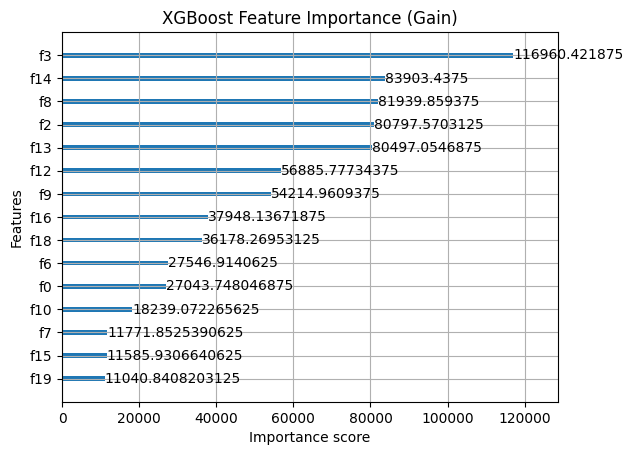

In [7]:
# Feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_regressor, max_num_features=15, importance_type='gain')
plt.title('XGBoost Feature Importance (Gain)')
plt.show()

In [8]:
# Hyperparameter tuning example with cross-validation
param_grid = {
  'max_depth': [3, 5, 7],
  'learning_rate': [0.01, 0.1, 0.3],
  'n_estimators': [50, 100, 200]
}
print("\nPerforming grid search for optimal parameters...")

from sklearn.model_selection import GridSearchCV
xgb_cv = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(
                xgb_cv,
                param_grid,
                cv=3,
                scoring='neg_mean_squared_error',
                verbose=0
)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.4f}")


Performing grid search for optimal parameters...
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best CV RMSE: 95.9460
